### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

### Load the Dataset

In [4]:
# Import the dataset
df = pd.read_excel('Online Retail.xlsx')

### Data Exploration

In [5]:
# Check top 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Check size of the dataset
df.shape

(541909, 8)

In [7]:
# Check column type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Show descriptive analysis of numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Show descriptive analysis of categorical columns
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [10]:
# Show missing value % of each column
ms_values_percentage = round(df.isnull().sum()/ len(df)*100,2)
pd.DataFrame({'Column Name':ms_values_percentage.index, 'Missing Values %':ms_values_percentage.values})

,Column Name,Missing Values %
0,InvoiceNo,0.00
1,StockCode,0.00
2,Description,0.27
3,Quantity,0.00
4,InvoiceDate,0.00
5,UnitPrice,0.00
6,CustomerID,24.93
7,Country,0.00


### Data Cleansing

In [11]:
# Remove missing values in column CustomerID
drop_idx = df[df.CustomerID.isnull() == True].index.tolist()
df = df.drop(drop_idx, axis = 0).reset_index()
df = df.drop('index', axis = 1)

In [12]:
# Show missing values count in each column after removing missing values in column CustomerID
ms_values_cnt = df.isnull().sum()
pd.DataFrame({'Column Name':ms_values_cnt.index, 'Count of Missing Values':ms_values_cnt.values})

,Column Name,Count of Missing Values
0,InvoiceNo,0
1,StockCode,0
2,Description,0
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,0
7,Country,0


In [13]:
# Change the data type of column CustomerID to integer
df.CustomerID = df.CustomerID.apply(lambda x: int(x))

In [14]:
# Show descriptive analysis of numerical columns after removing missing values in column CustomerID
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Remove outlier: zero or negative values in column Quantity and UnitPrice
drop_quantity_idx = df[df.Quantity <= 0].index.tolist()
df = df.drop(drop_quantity_idx, axis = 0)
drop_price_idx = df[df.UnitPrice <= 0].index.tolist()
df = df.drop(drop_price_idx, axis = 0).reset_index()
df = df.drop('index', axis = 1)

In [16]:
# Show descriptive analysis of numerical columns after removing outliers in column Quantity and UnitPrice
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
# Show descriptive analysis of categorical columns after removing outliers in column Quantity and UnitPrice
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,397884,397884,397884,397884
unique,18532,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2028,354321


### Create RFM Model

In [18]:
# Check the most recent purchase among all the transactions
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [19]:
# Calculate Recency
freq = df.groupby('CustomerID').agg({'InvoiceDate':'max'}).reset_index()
Recency = freq.InvoiceDate.apply(lambda x : (datetime(2011, 12, 31) - x).days)
freq['Duration'] = Recency

In [20]:
# Show Recency table
freq

,CustomerID,InvoiceDate,Duration
0,12346,2011-01-18 10:01:00,346
1,12347,2011-12-07 15:52:00,23
2,12348,2011-09-25 13:13:00,96
3,12349,2011-11-21 09:51:00,39
4,12350,2011-02-02 16:01:00,331
...,...,...,...
4333,18280,2011-03-07 09:52:00,298
4334,18281,2011-06-12 10:53:00,201
4335,18282,2011-12-02 11:43:00,28
4336,18283,2011-12-06 12:02:00,24


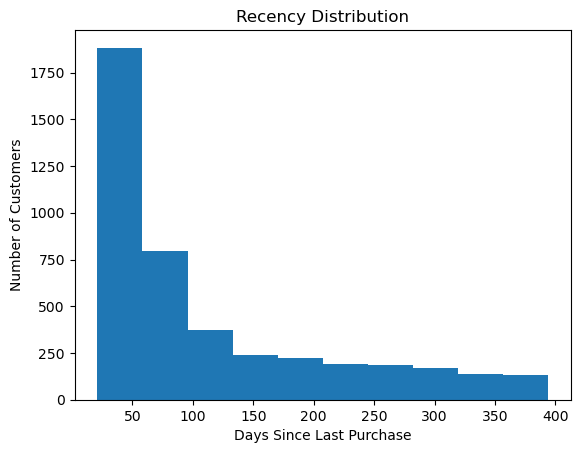

In [25]:
# Visualize Recency Distribution
plt.hist(Recency)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Recency Distribution')
plt.show()

In [22]:
# Calculate Frequency
freq2 = df.groupby('CustomerID').agg({'InvoiceDate':'count'}).reset_index()

In [23]:
# Show Frequency table
freq2

,CustomerID,InvoiceDate
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4333,18280,10
4334,18281,7
4335,18282,12
4336,18283,756


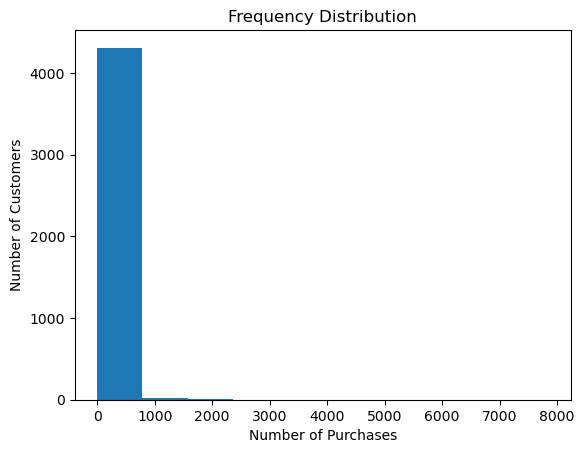

In [24]:
# Visualize Frequency Distribution
plt.hist(freq2.InvoiceDate.values)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Frequency Distribution')
plt.show()

In [26]:
# Calculate Monetary
df['Revenue'] = df.Quantity * df.UnitPrice
monetary = df.groupby('CustomerID').agg({'Revenue':'sum'}).reset_index()

In [27]:
# Show Monetary table
monetary

,CustomerID,Revenue
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4333,18280,180.60
4334,18281,80.82
4335,18282,178.05
4336,18283,2094.88


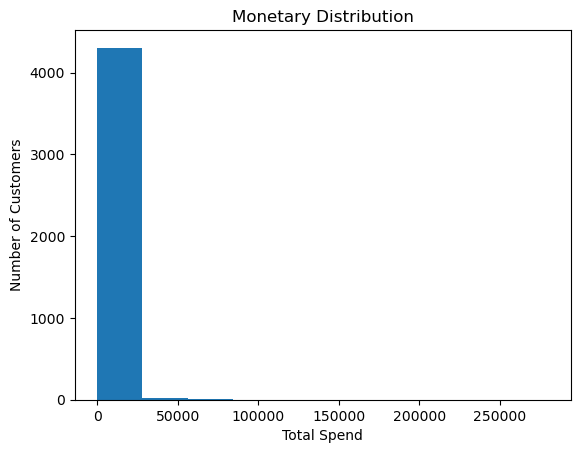

In [28]:
# Visualize Monetary Distribution
plt.hist(monetary.Revenue.values)
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.title('Monetary Distribution')
plt.show()

In [29]:
# Create RFM table
RFM = freq.merge(freq2, on = 'CustomerID')
RFM = RFM.merge(monetary, on = 'CustomerID')
RFM = RFM.drop('InvoiceDate_x', axis = 1)
RFM = RFM.rename(columns = {'Duration': 'Recency', 'InvoiceDate_y': 'Frequency', 'Revenue':'Monetary'})

In [30]:
# Show RFM table
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12347,23,182,4310.00
2,12348,96,31,1797.24
3,12349,39,73,1757.55
4,12350,331,17,334.40
...,...,...,...,...
4333,18280,298,10,180.60
4334,18281,201,7,80.82
4335,18282,28,12,178.05
4336,18283,24,756,2094.88


### Perform K-Means Clustering Algorithm

In [31]:
# Perform data normalization and scaling on RFM table to bring data into normal or near normal distribution
RFM_var = RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM_var)
RFM_processed = pd.DataFrame(scaled, index = RFM_var.index, columns = RFM_var.columns)

In [33]:
# Show RFM table after data normalization and scaling
RFM_processed

,Recency,Frequency,Monetary
0,1.740668,-2.775156,3.698763
1,-1.439628,1.149555,1.410440
2,0.236743,-0.185329,0.716408
3,-0.819054,0.460242,0.698958
4,1.689051,-0.638586,-0.617720
...,...,...,...
4333,1.565875,-1.038298,-1.106318
4334,1.103670,-1.307537,-1.744034
4335,-1.208526,-0.901038,-1.117423
4336,-1.389184,2.223496,0.837765


C:\Users\ChenSabr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChenSabr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChenSabr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ChenSabr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

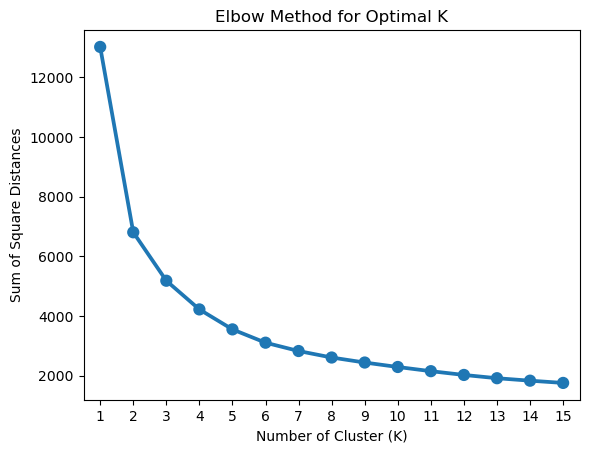

In [35]:
# Perform K-Means clustering algorithm on RFM table
# Apply Elbow Method to determine the optimal number of cluster (optimal K = 5)
sum_square = {}

for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, init = 'k-means++').fit(RFM_processed)
    sum_square[k] = km.inertia_
    
sns.pointplot(x= list(sum_square.keys()), y= list(sum_square.values()))
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

### RFM Analysis

In [36]:
# Create copy of initial RFM table
RFM_score = RFM.copy()

In [42]:
# Assign R, F and M score to existing Recency, Frequency and Monetary values from 1 to 5 (optimal number of cluster = 5)
RFM_score['R_Score'] = pd.qcut(RFM_score['Recency'], q=5, labels=[5, 4, 3, 2, 1])
RFM_score['F_Score'] = pd.qcut(RFM_score['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
RFM_score['M_Score'] = pd.qcut(RFM_score['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Calculate the concatenated RFM score
RFM_score['RFM_Sum_Score'] = RFM_score['R_Score'].astype(int) + RFM_score['F_Score'].astype(int) + RFM_score['M_Score'].astype(int)
RFM_score['RFM_Concat_Score'] = RFM_score['R_Score'].astype(str) + RFM_score['F_Score'].astype(str) + RFM_score['M_Score'].astype(str)

# Show top 5 rows of RFM score table
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Sum_Score,RFM_Concat_Score
0,12346,346,1,77183.60,1,1,5,7,115
1,12347,23,182,4310.00,5,5,5,15,555
2,12348,96,31,1797.24,2,3,4,9,234
3,12349,39,73,1757.55,4,4,4,12,444
4,12350,331,17,334.40,1,2,2,5,122


In [71]:
# Create a function to classify customers into 5 groups and assign group names based on RFM score
def segmentation(row):
    
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Loyal: High R, F, and M scores
    if r >= 4 and f >= 4 and m >= 4:
        return 'Loyal'
    
    # Loyalist: Above average R, Above average F, Above average M
    elif r >= 3 and f >= 3 and m >= 1:
        return 'Potential Loyal'
    
    # New Customers: Above average R, Low F and M
    elif r >= 3 and f <= 2 and m <= 5:
        return 'New'
    
    # Valuable Customers: Low R, Above average F and M
    elif r <= 2 and f >= 1 and m >= 3:
        return 'Cannot Lose Them'
    
    # Lost: Low overall score
    else:
        return 'At Risk'


RFM_score['Concat_Segment'] = RFM_score.apply(segmentation, axis=1)

# Show the customer count in each group
RFM_score['Concat_Segment'].value_counts()

At Risk             1022
Potential Loyal     1007
Loyal                921
Cannot Lose Them     705
New                  683
Name: Concat_Segment, dtype: int64